# **FGV EESP**

- ## Regressão Linear - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
install.packages("broom")
install.packages("stargazer")
install.packages("urca")

In [68]:
library(broom)
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)

### **Dados**

In [2]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "minimum_wage_increase", "minimum_wage_increase_deflated", "income_increase", "income_increase_deflated", "household_income_deflated", "household_income_deflated_trend", "household_income_deflated_trend_diff", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_trend_diff", "pib", "primary_fiscal_result", "primary_fiscal_result_pct_pib", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_pct_pib_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [3]:
str(df_public_data)

'data.frame':	210 obs. of  33 variables:
 $ year                                    : num  2006 2006 2006 2006 2006 ...
 $ month_name                              : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ month_date                              : Date, format: "2006-01-01" "2006-02-01" ...
 $ month                                   : Time-Series  from 2006 to 2023: 2006 2006 2006 2006 2006 ...
 $ market_inflation_expectation            : Time-Series  from 2006 to 2023: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ consumer_inflation_expectation          : Time-Series  from 2006 to 2023: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ inflation_target                        : Time-Series  from 2006 to 2023: 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 ...
 $ inflation_target_lower_bound            : Time-Series  from 2006 to 2023: 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ inflation_target_upper_bound            : Time-Series  from 2006 to 2023: 6

## **Modelo Linear**

> #### **Expectativa de Inflação dos Consumidores**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


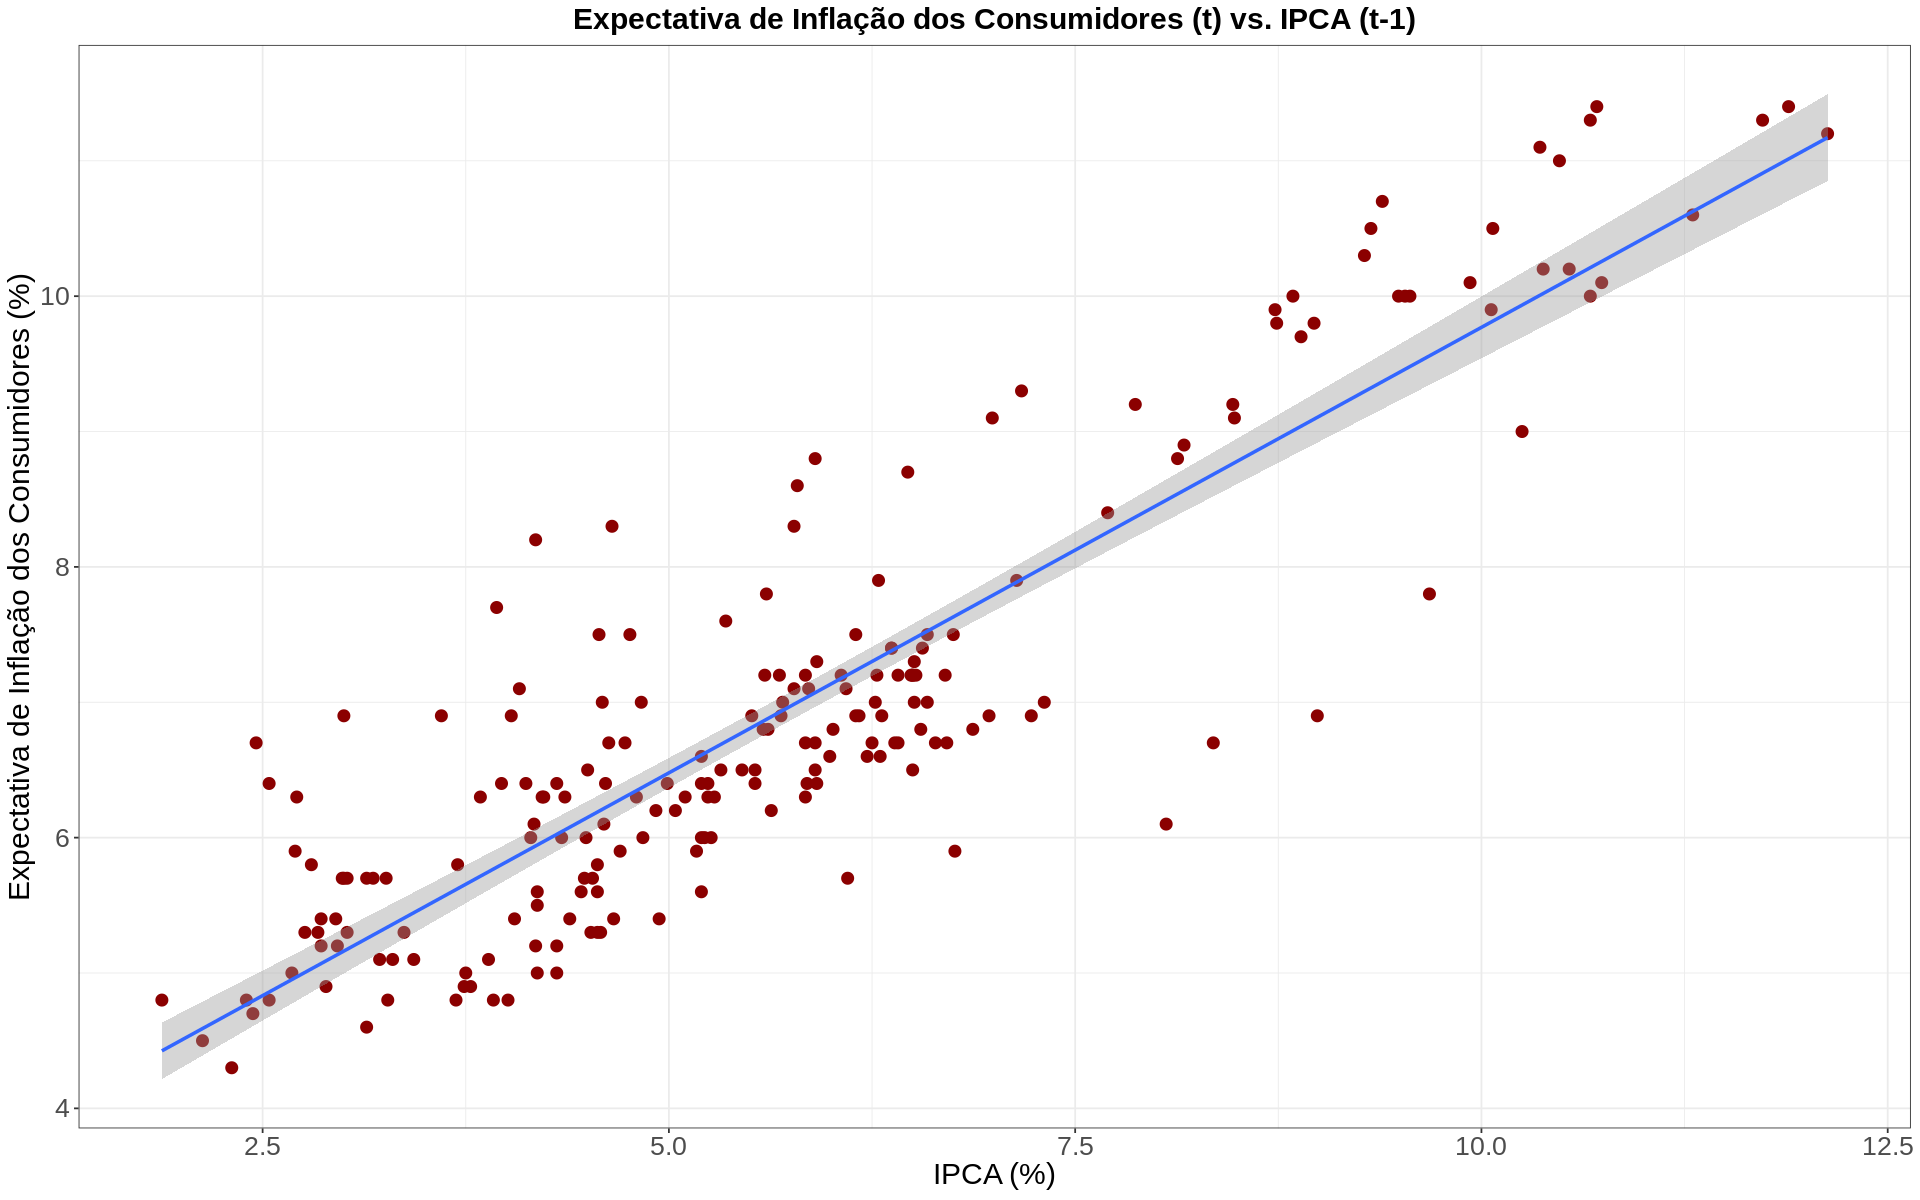

In [4]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = consumer_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação dos Consumidores (%)", title = "Expectativa de Inflação dos Consumidores (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [5]:
# Consumer Inflation Expectation
ols_model_consumer <- lm(consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_consumer)


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3694 -0.2961  0.3914  1.3538  3.8899 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  1.14231    0.01569   72.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.395 on 209 degrees of freedom
Multiple R-squared:  0.962,	Adjusted R-squared:  0.9619 
F-statistic:  5297 on 1 and 209 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 95% da expectativa de inflação dos consumidores, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação dos Consumidores (t) varia 1,142%

> #### **Expectativa de Inflação do Mercado**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


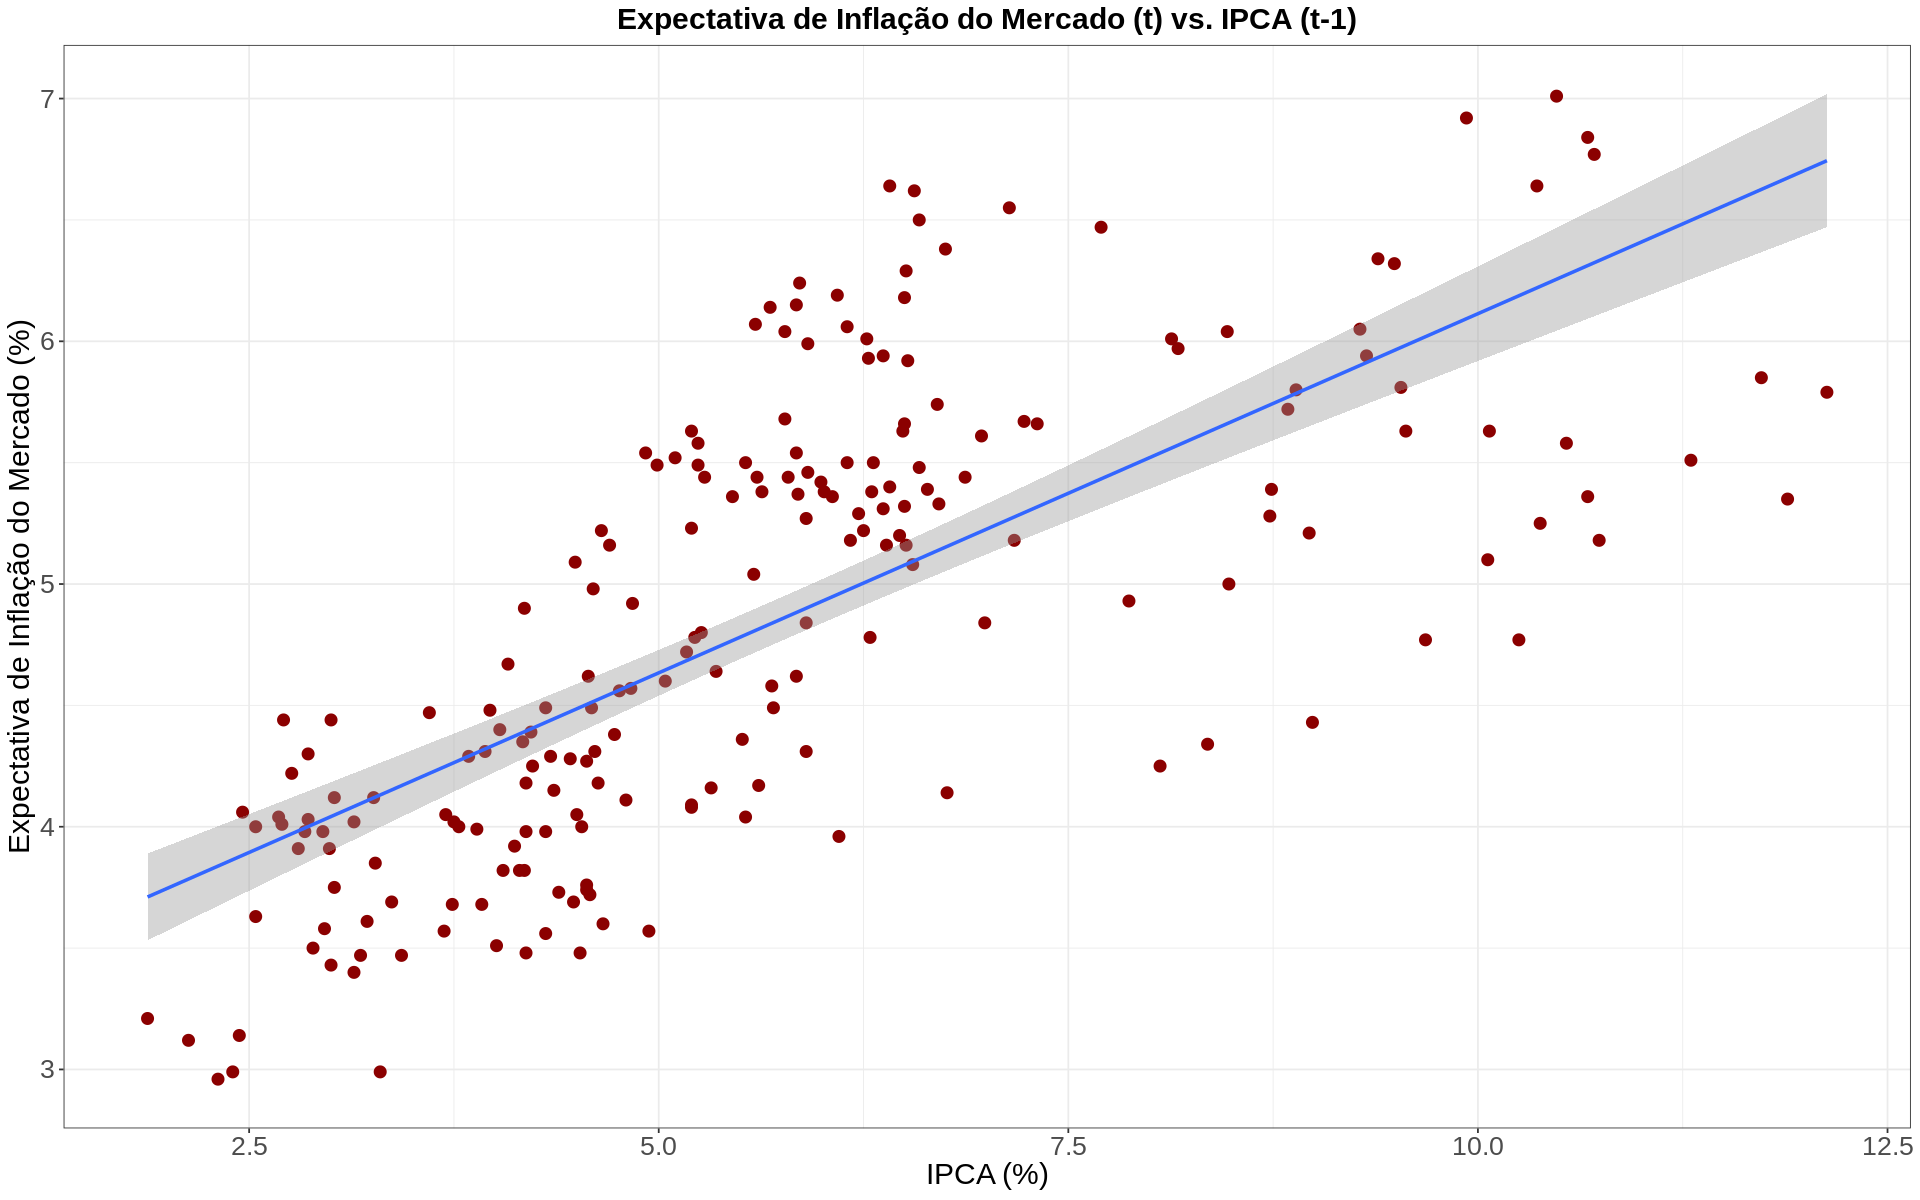

In [6]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "market_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = market_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação do Mercado (%)", title = "Expectativa de Inflação do Mercado (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [7]:
# Market Inflation Expectation
ols_model_market <- lm(market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_market)


Call:
lm(formula = market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8649  0.0681  0.7228  1.2479  2.3397 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  0.77501    0.01492   51.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.326 on 209 degrees of freedom
Multiple R-squared:  0.9281,	Adjusted R-squared:  0.9278 
F-statistic:  2700 on 1 and 209 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 90% da expectativa de inflação do mercado, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação do Mercado (t) varia 0,775%

> ## **What Drives Inflation Expectations in Brazil?**

- Reference: Cerisola and Gelos, 2005

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


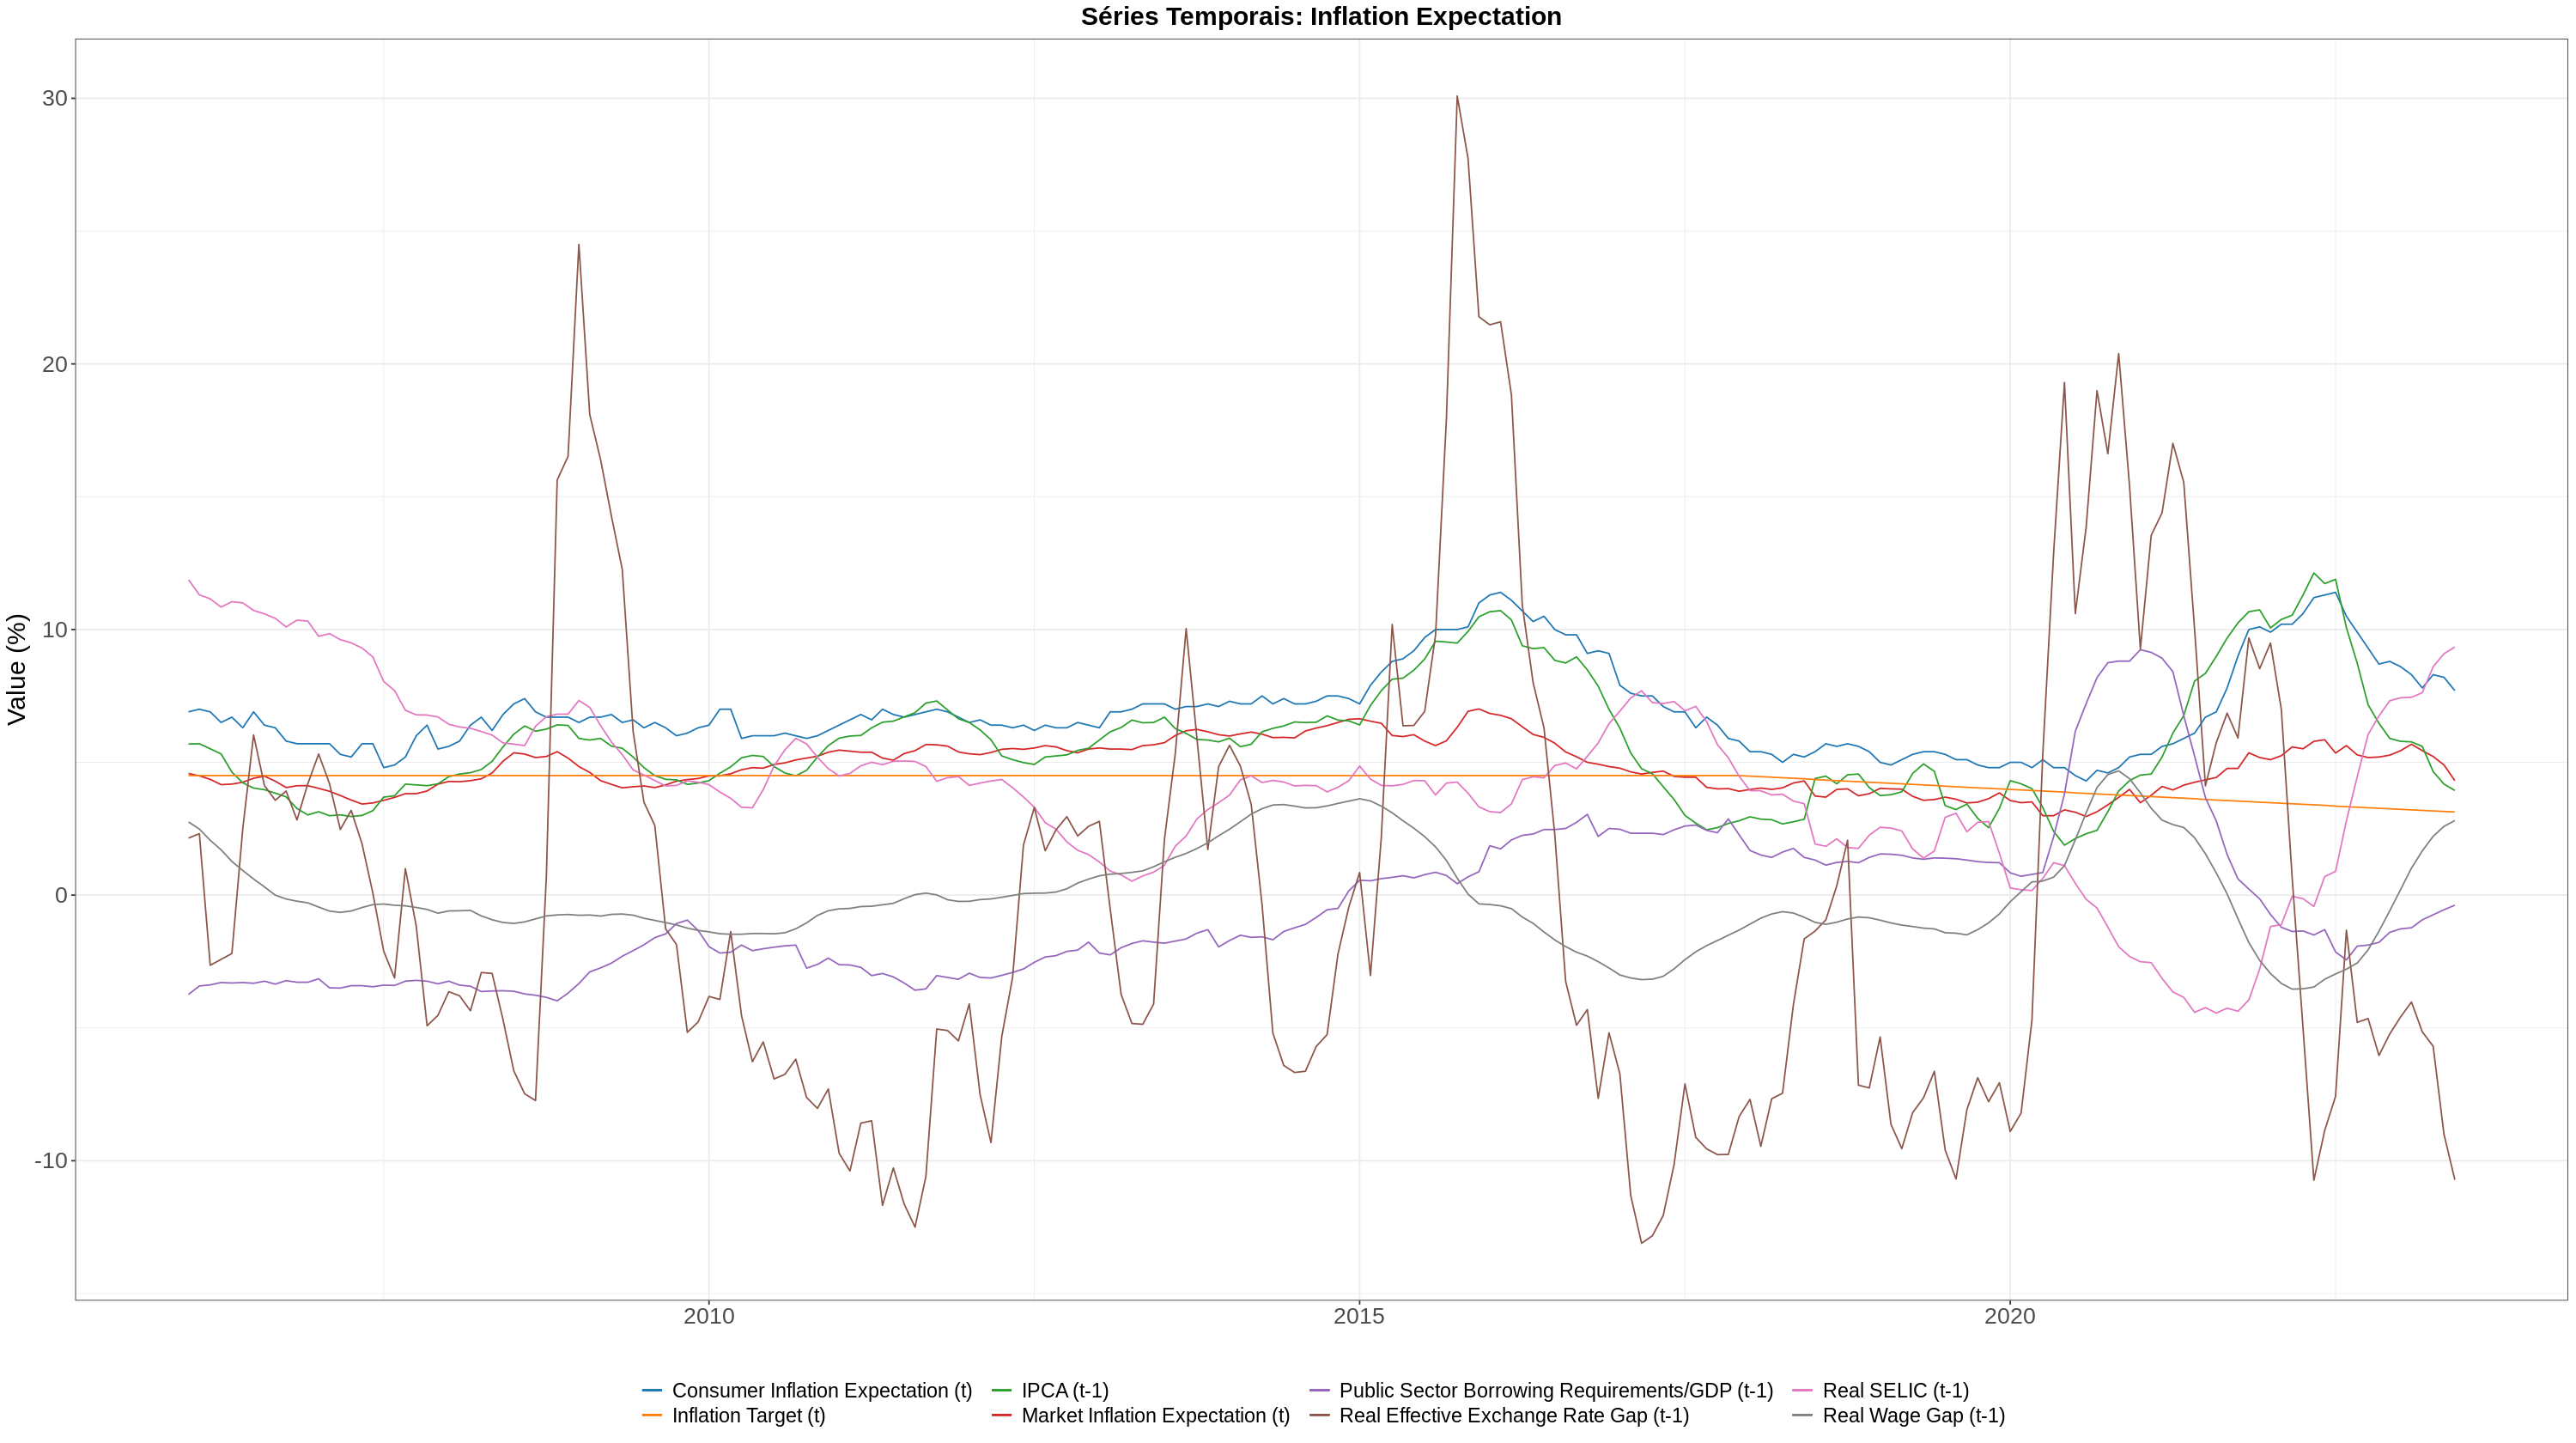

In [82]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 25, repr.plot.height = 14)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = inflation_target_wtd_avg, color = "Inflation Target (t)")) +
  geom_line(aes(x = month, y = primary_fiscal_result_pct_pib_lag, color = "Public Sector Borrowing Requirements/GDP (t-1)")) +
  geom_line(aes(x = month, y = selic_deflated_lag, color = "Real SELIC (t-1)")) +
  geom_line(aes(x = month, y = real_exchange_rate_trend_diff_lag, color = "Real Effective Exchange Rate Gap (t-1)")) +
  geom_line(aes(x = month, y = household_income_deflated_trend_diff_lag, color = "Real Wage Gap (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> #### **Regressão Linear Múltipla**

> **Equação do modelo econométrico proposto para responder a pergunta**

\begin{align*}
\text{inflation_expectation}_t
&= \alpha_0 \\
&+ \alpha_1 \cdot \text{IPCA}_{t-1} \\
&+ \alpha_2 \cdot \text{Inflation Target}_{t} \\
&+ \alpha_3 \cdot \text{Public Sector Borrowing Requirements/GDP}_{t-1} \\
&+ \alpha_4 \cdot \text{Real SELIC}_{t-1} \\
&+ \alpha_5 \cdot \text{Real Effective Exchange Rate Gap}_{t-1} \\
&+ \alpha_6 \cdot \text{Real Wage Gap}_{t-1} \\
&+ ɛ_i
\end{align*}

> **Teste de hipótese para cada ${\alpha_n}$ com $n = [1,6]$**

  - ${H}_0: \alpha_n = 0$
  - ${H}_a: \alpha_n \neq 0$

> **Nível de significância**

- **β** = 5%

> **Modelo econométrico**

In [13]:
consumer_linear_model = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag,
    data = df_public_data)

market_linear_model = lm(market_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag,
    data = df_public_data)

In [15]:
summary( consumer_linear_model )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag, 
    data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5623 -0.3684  0.0549  0.4021  1.2301 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               3.580e+00  4.837e-01   7.402 3.50e-12
ipca_lag                                  7.462e-01  1.942e-02  38.419  < 2e-16
inflation_target_wtd_avg                 -4.049e-01  1.068e-01  -3.792 0.000197
primary_fiscal_result_pct_pib_lag         1.272e-01  1.688e-02   7.538 1.56e-12
selic_deflated_lag                        2.163e-01  1.489e-02  14.531  < 2e-16
real_exchange_rate_trend_diff_lag        -5.397e-05  4.878e-03  -0.011 0.991183
household_income_deflated_trend_diff_lag -8.004e-02  2.222e-02  -3.

**Resultado**

- A variável `real_exchange_rate_trend_diff_lag` não é estatisticamente significativa dado o nível de significância β escolhido, enquanto que as outras variáveis são estatisticamente significativas.

In [17]:
summary( market_linear_model )


Call:
lm(formula = market_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag, 
    data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3153 -0.3321 -0.0013  0.3126  1.1048 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -0.028621   0.448771  -0.064   0.9492
ipca_lag                                  0.362375   0.018020  20.110  < 2e-16
inflation_target_wtd_avg                  0.626524   0.099061   6.325 1.59e-09
primary_fiscal_result_pct_pib_lag        -0.033160   0.015657  -2.118   0.0354
selic_deflated_lag                        0.027467   0.013812   1.989   0.0481
real_exchange_rate_trend_diff_lag        -0.018509   0.004526  -4.090 6.22e-05
household_income_deflated_trend_diff_lag  0.178670   0.020614   8.667 1.40e-

**Resultado**

- A variável `Intercept` não é estatisticamente significativa dado o nível de significância β escolhido, enquanto que as outras variáveis são estatisticamente significativas.

> **Modelo econométrico apenas com variáveis estatisticamente significativas**

In [18]:
consumer_linear_model_adjusted = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + household_income_deflated_trend_diff_lag,
    data = df_public_data)

market_linear_model_adjusted = lm(market_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 1,
    data = df_public_data)

In [19]:
summary( consumer_linear_model_adjusted )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    household_income_deflated_trend_diff_lag, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56235 -0.36810  0.05494  0.40175  1.23033 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               3.58132    0.47543   7.533 1.58e-12
ipca_lag                                  0.74616    0.01836  40.631  < 2e-16
inflation_target_wtd_avg                 -0.40499    0.10590  -3.824 0.000174
primary_fiscal_result_pct_pib_lag         0.12717    0.01636   7.772 3.74e-13
selic_deflated_lag                        0.21634    0.01485  14.567  < 2e-16
household_income_deflated_trend_diff_lag -0.08013    0.02073  -3.865 0.000149
                                            
(Intercept)                              ***
ipca_lag              

In [20]:
summary( market_linear_model_adjusted )


Call:
lm(formula = market_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31509 -0.33086 -0.00146  0.31320  1.09814 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
ipca_lag                                  0.361883   0.016240  22.283  < 2e-16
inflation_target_wtd_avg                  0.620499   0.029711  20.885  < 2e-16
primary_fiscal_result_pct_pib_lag        -0.033492   0.014734  -2.273   0.0241
selic_deflated_lag                        0.027471   0.013778   1.994   0.0475
real_exchange_rate_trend_diff_lag        -0.018460   0.004448  -4.150 4.88e-05
household_income_deflated_trend_diff_lag  0.178634   0.020556   8.690 1.18e-15
                                            
ipca_lag         

> **Distribuição dos Resíduos**

In [71]:
consumer_residuals <- residuals(consumer_linear_model_adjusted)
consumer_residuals_df <- consumer_residuals %>% as.data.frame()  %>% rename(residuals = ".")

market_residuals <- residuals(market_linear_model_adjusted)
market_residuals_df <- market_residuals %>% as.data.frame()  %>% rename(residuals = ".")

In [72]:
stargazer(consumer_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 210 0.00   0.53   -1.56 1.23
--------------------------------------


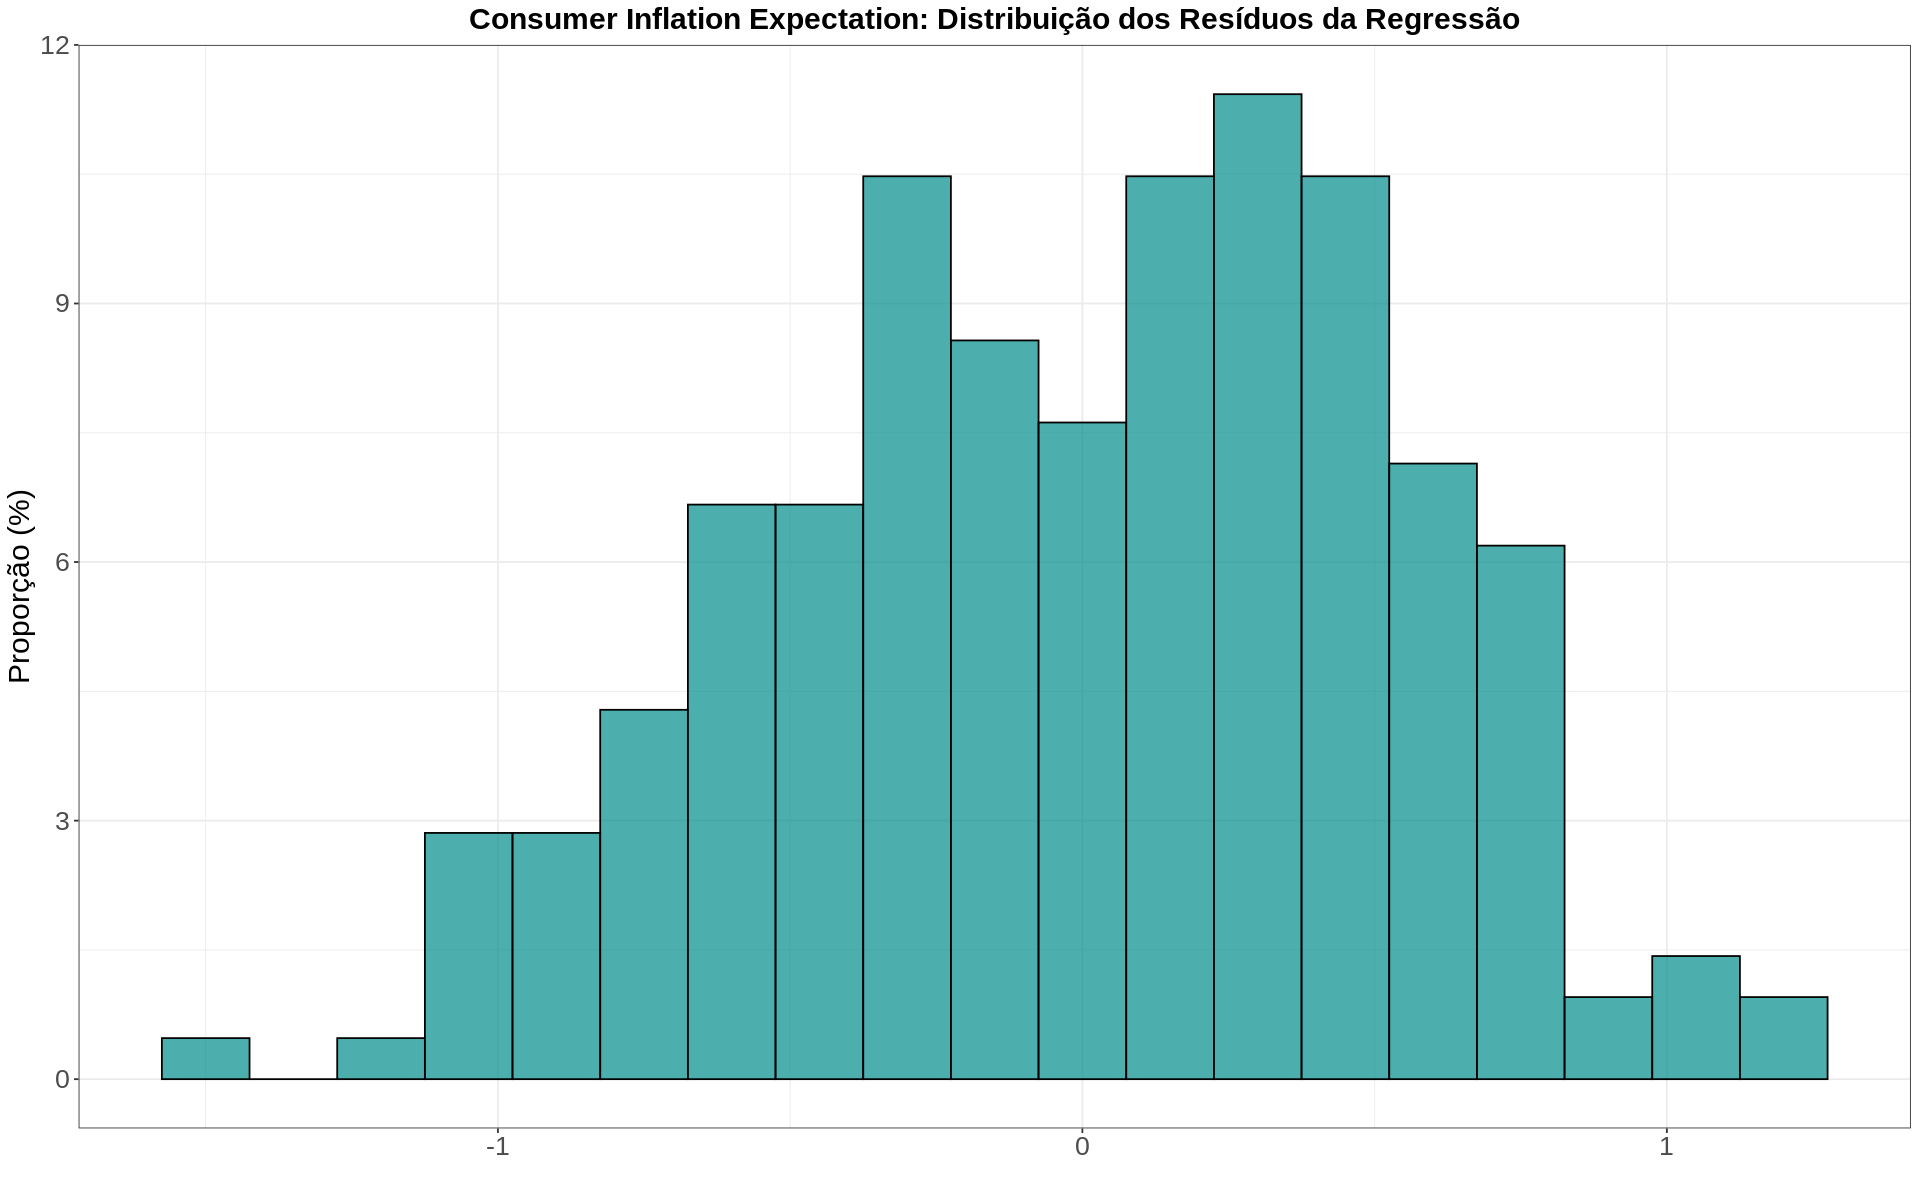

In [73]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(consumer_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Consumer Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [74]:
stargazer(market_residuals_df, digits = 2, type = "text")


Statistic  N   Mean   St. Dev.  Min  Max 
-----------------------------------------
residuals 210 -0.0002   0.49   -1.32 1.10
-----------------------------------------


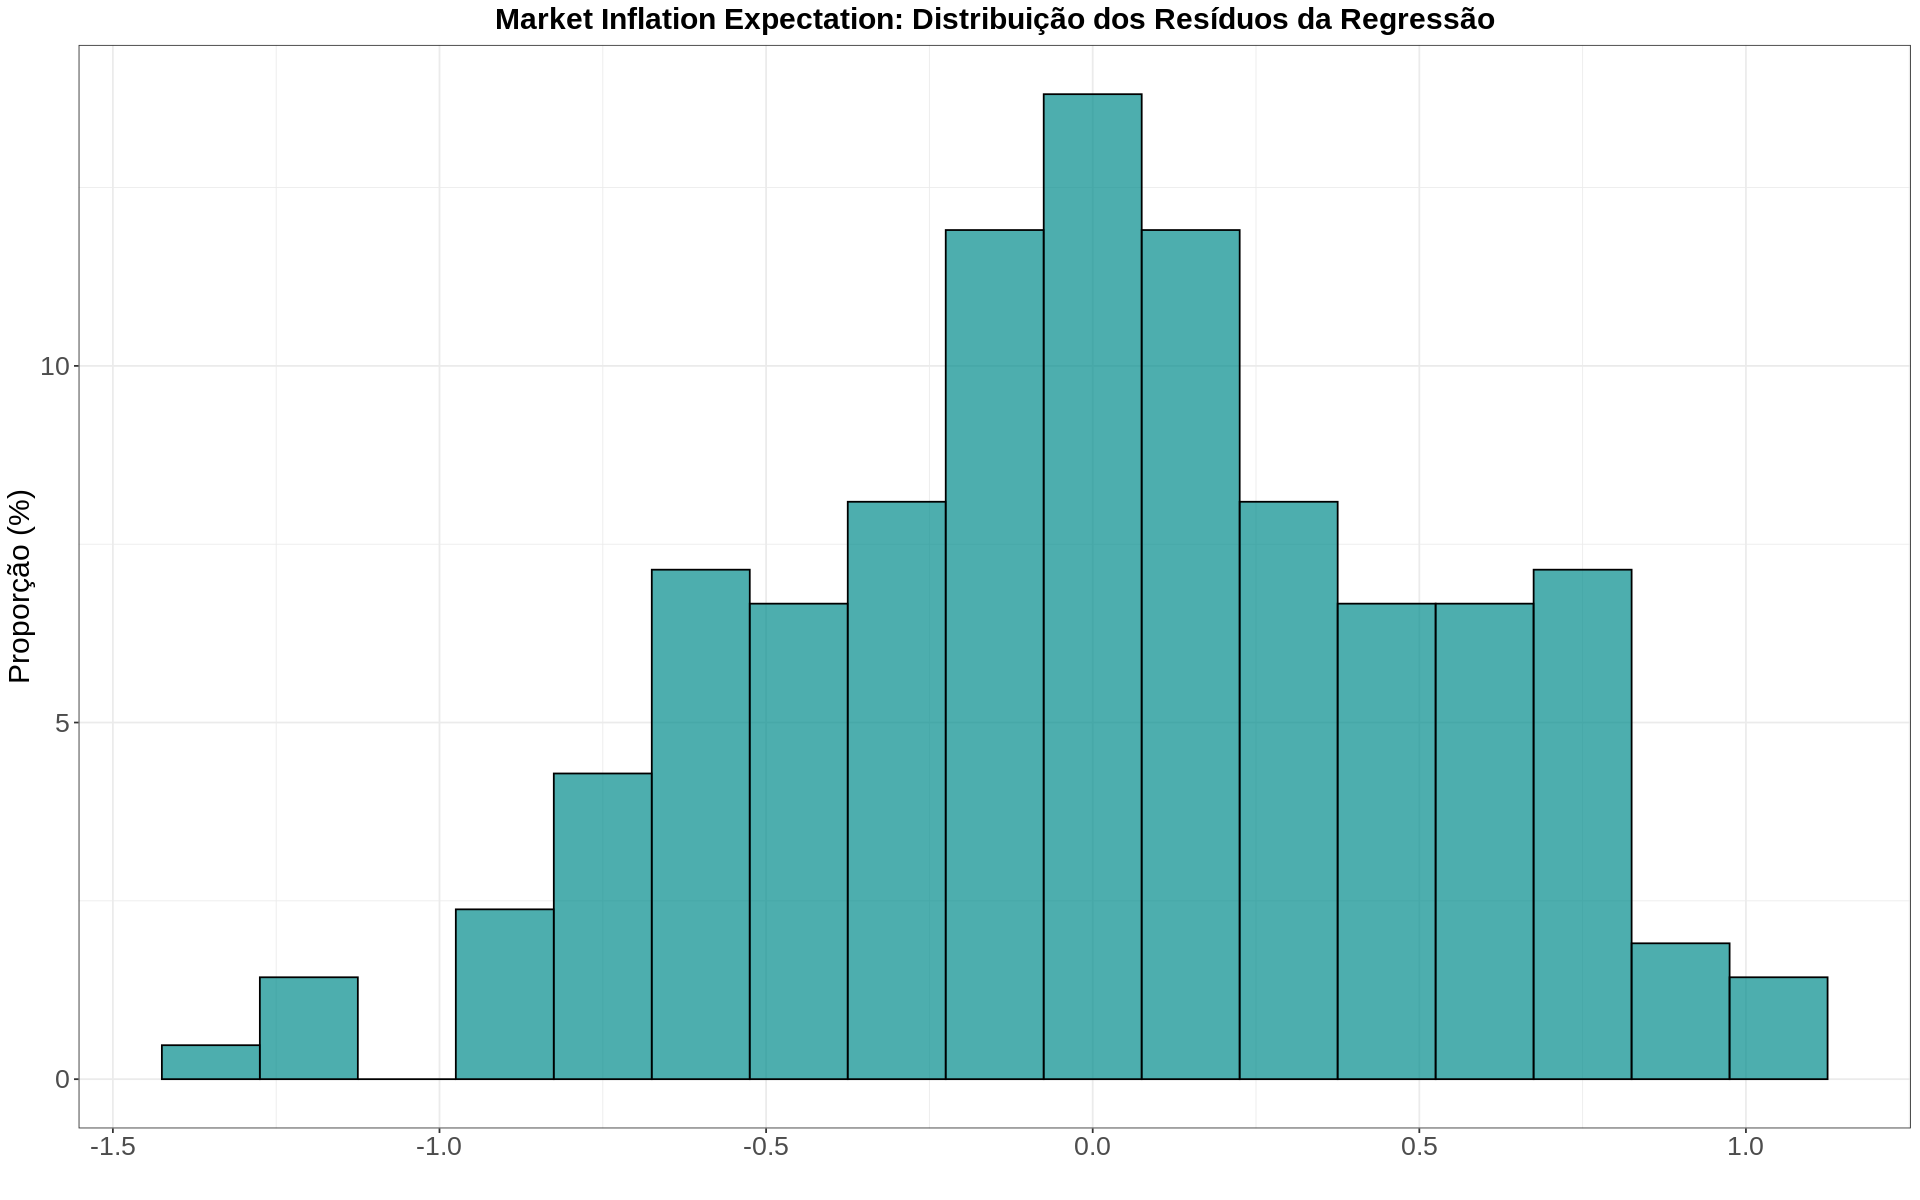

In [75]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o market_residuals dos resíduos da regressão com valores relativos em %
ggplot(market_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Market Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> **Estacionariedade dos Resíduos**

- **ADF**

In [77]:
summary( ur.df( consumer_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08360 -0.16955  0.00622  0.17329  0.94265 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0200983  0.0478098  -0.420  0.67470   
z.lag.1      -0.2093481  0.0661376  -3.165  0.00182 **
tt            0.0002564  0.0003839   0.668  0.50517   
z.diff.lag1   0.0354120  0.0847204   0.418  0.67645   
z.diff.lag2  -0.0198328  0.0837283  -0.237  0.81302   
z.diff.lag3   0.0559653  0.0841546   0.665  0.50687   
z.diff.lag4   0.0314590  0.0834040   0.377  0.70647   
z.diff.lag5   0.1393335  0.0816900   1.706  0.08978 . 
z.diff.lag6   0.0383742  0.0812121   0.473  0.63712   
z.diff.lag7   0.0319078  0.0787394   0.405  0.68578   
z.diff.lag8  -0.0177829  0.0788406  -0.226 

In [78]:
summary( ur.df( market_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99807 -0.09930  0.01088  0.10254  0.89886 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   6.638e-03  3.622e-02   0.183  0.85482   
z.lag.1      -1.230e-01  5.567e-02  -2.210  0.02836 * 
tt            3.576e-05  2.905e-04   0.123  0.90218   
z.diff.lag1   1.769e-01  8.256e-02   2.143  0.03342 * 
z.diff.lag2  -1.006e-01  8.367e-02  -1.203  0.23067   
z.diff.lag3   2.597e-02  8.125e-02   0.320  0.74959   
z.diff.lag4  -6.567e-02  8.181e-02  -0.803  0.42318   
z.diff.lag5  -1.034e-01  7.819e-02  -1.323  0.18760   
z.diff.lag6  -5.868e-02  7.646e-02  -0.768  0.44377   
z.diff.lag7  -1.526e-01  7.478e-02  -2.041  0.04274 * 
z.diff.lag8  -2.010e-01  7.359e-02  -2.731 

- **KPSS**

In [79]:
summary( ur.kpss( consumer_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2416 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


In [80]:
summary( ur.kpss( market_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.3819 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216
